In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [6]:
X_train = pd.read_csv('../data/X_train.csv').to_numpy()[1:,1:]
y_train = pd.read_csv('../data/y_train.csv').to_numpy()[1:,1:].astype('int')
X_test = pd.read_csv('../data/X_test.csv').to_numpy()[1:,1:]
y_test = pd.read_csv('../data/y_test.csv').to_numpy()[1:,1:].astype('int')

In [7]:
def random_forest_classifier(X_train, y_train, X_test, y_test):
    # Apply scale datasets
    # create model scale ==> standard scaler
    scaler = StandardScaler()   
    # fit dataset to model scale
    X_train_scl = scaler.fit_transform(X_train)
    X_test_scl = scaler.fit_transform(X_test)
    
    # convert matrix 2d -> 1d (by flatten method)    
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    # Random forest classifier model
    rf = RandomForestClassifier(random_state=0, n_jobs=-1)
    rf.fit(X_train_scl, y_train)
    
    # Predict testing dataset
    y_pred = rf.predict(X_test)
    
    # Predict probability (0, 1) 
    y_score = rf.predict_proba(X_test)
    
    # ROC curve: receiver operating characteristic curve
    # AUC: Area Under the ROC Curve 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1], pos_label=2)
    auc = metrics.auc(fpr, tpr)
        
    return rf, fpr, tpr, thresholds, auc

In [8]:
def RFE_RF(X_train, y_train, X_test, y_test, n_feature):
    
    # Apply scale datasets
    # create model scale ==> standard scaler
    scaler = StandardScaler()
    # fit dataset to model scale
    X_train_scl = scaler.fit_transform(X_train)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    # Random forest classifier estimator
    rf = RandomForestClassifier(random_state=0, n_jobs=-1)
    
    # RFE model
    rfe = RFE(estimator=rf, n_features_to_select=n_feature, step=1, verbose=1)
    rfe.fit_transform(X_train_scl, y_train)
    
    # Reduce X to the selected features.
    X_train_reduce = rfe.transform(X_train)
    X_test_reduce = rfe.transform(X_test)
    
    rf, fpr, tpr, thresholds, auc = random_forest_classifier(X_train_reduce, y_train, X_test_reduce, y_test)
    return rfe, rf, fpr, tpr, thresholds, auc

In [9]:
# number_feature_to_select = 390 

In [10]:
# rfe_rf, rf, fpr, tpr, thresholds, auc = RFE_RF(X_train, y_train, X_test, y_test, number_feature_to_select)

In [11]:
# print("False Positive Rate (fpr): ")
# print(fpr)

In [12]:
# fpr

In [13]:
# print("True Positive Rate (tpr): ")
# print(tpr)

In [14]:
# tpr

In [15]:
# print("AUC:", auc)

In [16]:
# RF_RFE

tpr_rf = [0.    , 0.0625, 0.125 , 0.25  , 0.25  , 0.25  , 0.3125, 0.4375,
       0.8125, 0.8125, 0.875 , 0.875 , 0.9375, 0.9375, 1.    , 1.    ]

fpr_rf = [0.        , 0.        , 0.        , 0.08333333, 0.16666667,
       0.33333333, 0.41666667, 0.41666667, 0.41666667, 0.5       ,
       0.5       , 0.75      , 0.75      , 0.83333333, 0.83333333,
       1.        ]

auc_rf = 0.6328125

In [17]:
len(fpr_rf)


16

In [18]:
# SVM_RFE
tpr_svm = [0.    , 0.    , 0.125 , 0.125 , 0.25  , 0.25  , 0.375 , 0.375 ,
       0.4375, 0.4375, 0.5625, 0.5625, 0.8125, 0.8125, 1.    ]
fpr_svm = [0.        , 0.08333333, 0.08333333, 0.25      , 0.25      ,
       0.33333333, 0.33333333, 0.58333333, 0.58333333, 0.83333333,
       0.83333333, 0.91666667, 0.91666667, 1.        , 1.        ]

auc_svm = 0.359375

In [19]:
# Logistic

fpr_lr= [0.        , 0.        , 0.25      , 0.25      , 0.33333333,
       0.33333333, 0.41666667, 0.41666667, 0.5       , 0.5       ,
       0.75      , 0.75      , 1.        , 1.        ]

tpr_lr = [0.    , 0.0625, 0.0625, 0.3125, 0.3125, 0.375 , 0.375 , 0.5   ,
       0.5   , 0.625 , 0.625 , 0.75  , 0.75  , 1.    ]

auc_lr = 0.4583333333333333

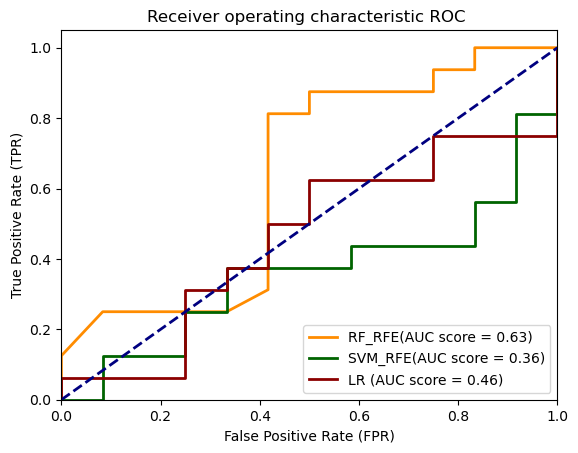

In [20]:
import matplotlib.pyplot as plt
from itertools import cycle

linewidth = 2
fig, ax = plt.subplots()

RF_RFE_line = ax.plot(fpr_rf, tpr_rf, color='darkorange',linewidth=linewidth, label='RF_RFE(AUC score = %0.2f)' %auc_rf)
SVM_RFE_line = ax.plot(fpr_svm, tpr_svm, color='darkgreen',linewidth=linewidth, label='SVM_RFE(AUC score = %0.2f)' %auc_svm)
LR_line = ax.plot(fpr_lr, tpr_lr, color='darkred',linewidth=linewidth, label='LR (AUC score = %0.2f)' %auc_lr)

line = ax.plot([0, 1], [0, 1], color='navy', linewidth=linewidth, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')

ax.set_title('Receiver operating characteristic ROC ')
ax.legend(loc="lower right")
plt.savefig('./save_chart/ROC.png')
plt.show()